In [1]:
import numpy as np
import scipy as sp
import scipy.special
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy.integrate import quad

# $A^{(1)}(kr)$

In [15]:
def plot1(krrange, N, xrange=[0,100], loglog=True):
    plt.figure(0, (14,7))
    plt.xlabel("x", fontsize=16)
    plt.ylabel(r"$I_0(\frac{2kr}{\cosh{\frac{x}{2}}})\frac{1}{2\cosh^2{\frac{x}{2}}}$", fontsize=18)
    if loglog:
        plt.loglog()
    else:
        plt.yscale("log")
    krs = np.linspace(*krrange, N)
    for kr in krs:
        x = np.linspace(*xrange, 5000)
        y = sp.special.iv(0,2*kr/np.cosh(x/2.))/2./np.cosh(x/2.)**2
        plt.plot(x,y, label="kr=%f"%kr)
    plt.legend(fontsize=16)
    
def plot2(eta, krrange, N, xrange=[0,100], loglog=True):
    plt.figure(0, (14,7))
    plt.xlabel("x", fontsize=16)
    plt.ylabel(r"$I_0(\frac{2kr}{\cosh{\frac{x}{2}}})\frac{1}{2\cosh^2{\frac{x}{2}}}\cos{(\eta x)}\cos{(-2kr\cdot\tanh{\frac{x}{2}})}$", fontsize=18)
    if loglog:
        plt.loglog()
    else:
        plt.yscale("log")
    krs = np.linspace(*krrange, N)
    for kr in krs:
        x = np.linspace(*xrange, 20000)
        y = np.cos(eta*x)*np.cos(-2*kr*np.tanh(x/2.))*sp.special.iv(0,2*kr/np.cosh(x/2.))/2./np.cosh(x/2.)**2
        plt.plot(x,np.abs(y), label="kr=%f"%kr)
    plt.legend(fontsize=16)

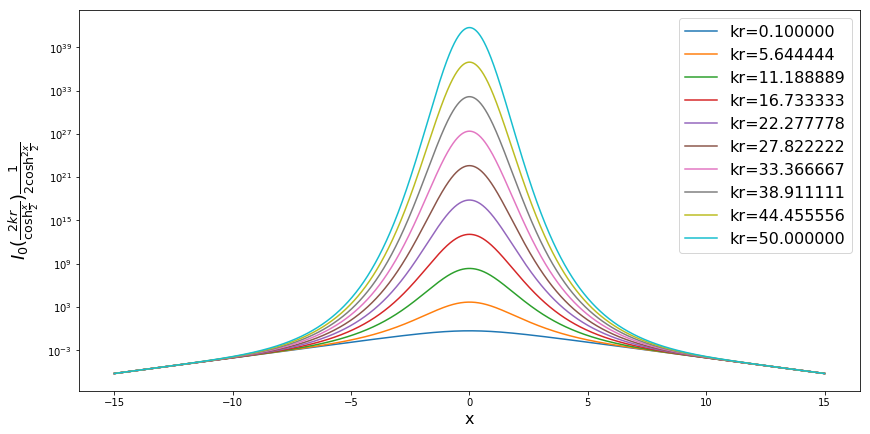

In [40]:
plot1([0.1, 50], 10, xrange=[-15,15], loglog=False)

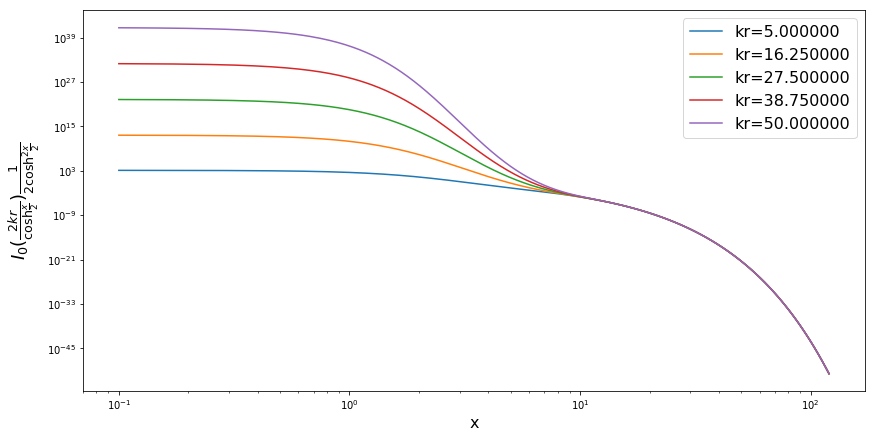

In [46]:
plot1([5, 50], 5, xrange=[1e-1,120], loglog=True)

## Full

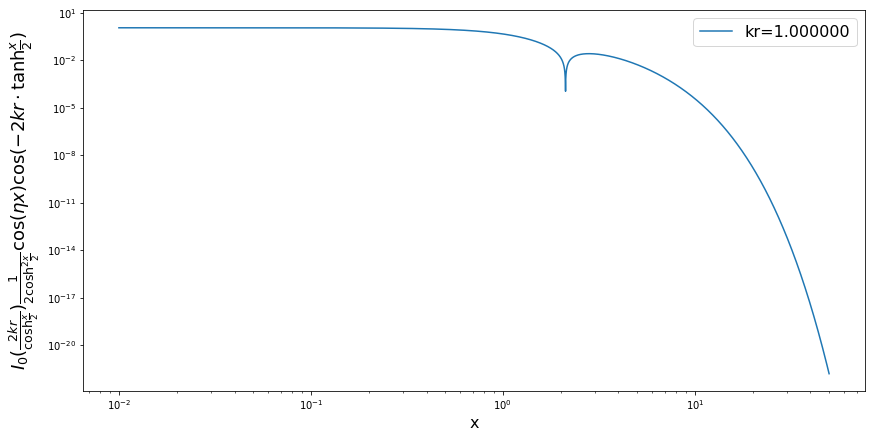

In [16]:
plot2(1e-4, [1, 1], 1, xrange=[1e-2,50])

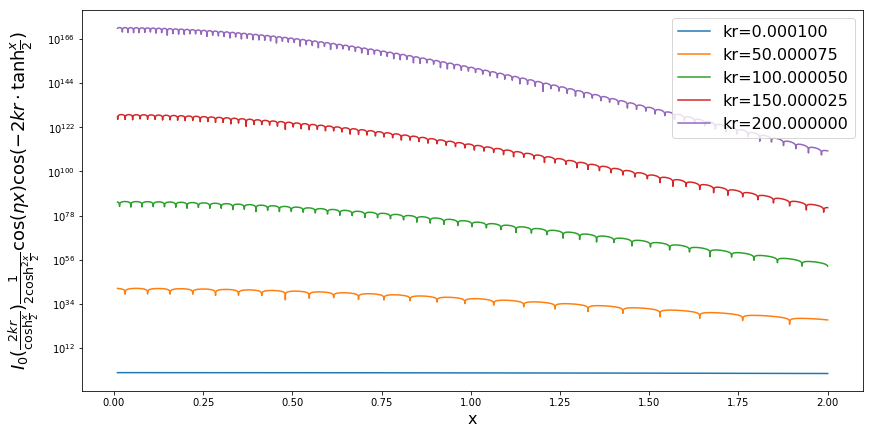

In [109]:
plot2(0.25, [1e-4, 200], 5, xrange=[1e-2,2],loglog=False)

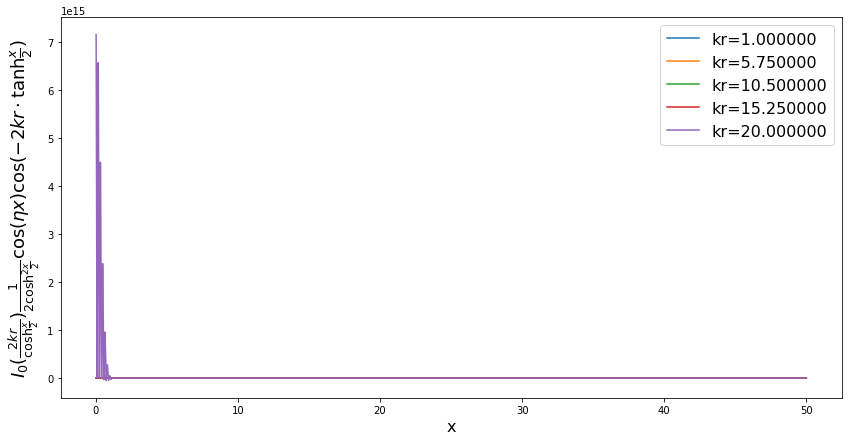

In [14]:
plot2(20, [1, 20], 5, xrange=[1e-2,50])

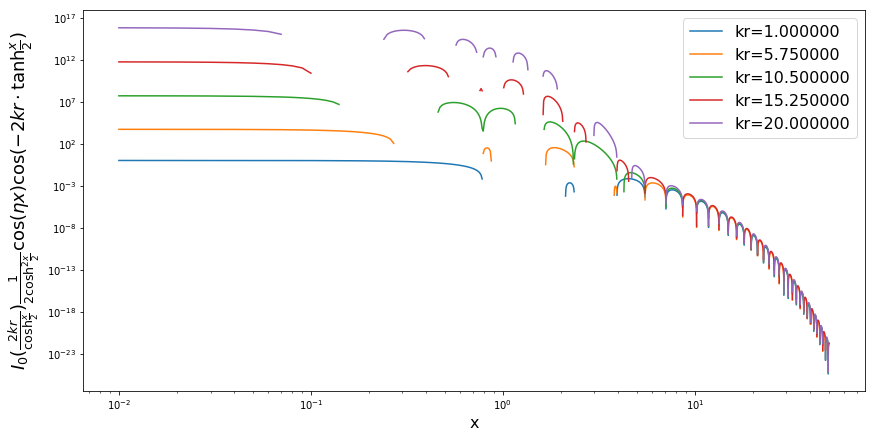

In [72]:
plot2(2, [1, 20], 5, xrange=[1e-2,50])

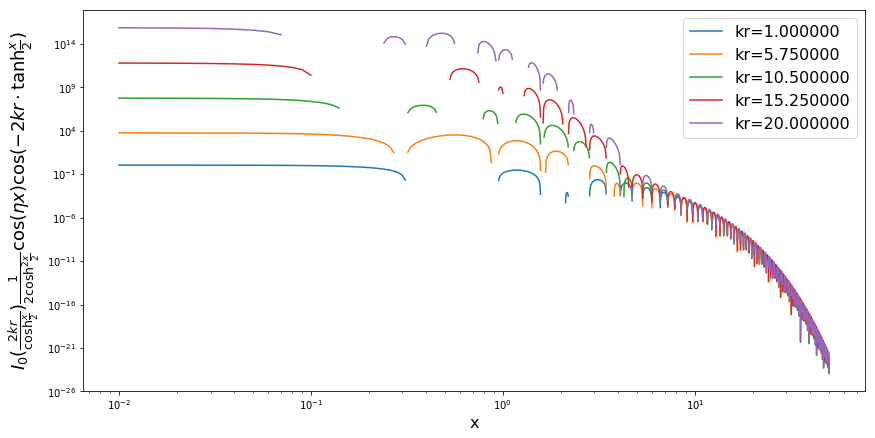

In [71]:
plot2(5, [1, 20], 5, xrange=[1e-2,50])

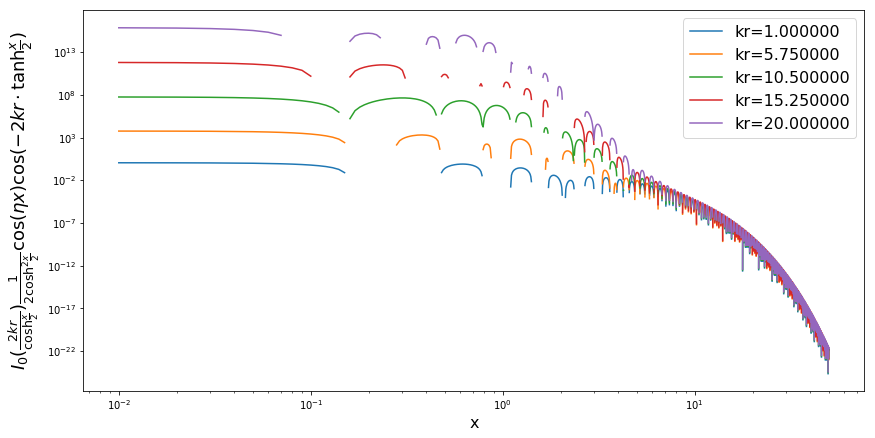

In [70]:
plot2(10, [1, 20], 5, xrange=[1e-2,50])

## Integrate

In [59]:
func = lambda x,kr,eta: np.cos(eta*x)*np.cos(-2*kr*np.tanh(x/2.))*sp.special.iv(0,2*kr/np.cosh(x/2.))/2./np.cosh(x/2.)**2

In [60]:
quad(func, -np.inf, np.inf, args=(10, 2))

C:\Users\qati\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
C:\Users\qati\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in cosh
  if __name__ == '__main__':


(408.2438367138835, 2.0625879304698975e-06)

In [61]:
quad(func, -np.inf, np.inf, args=(20, 5))

C:\Users\qati\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
C:\Users\qati\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in cosh
  if __name__ == '__main__':
C:\Users\qati\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


(4731263.09375, 27.168773922324995)

# $A^{(2)}(kr)$

In [29]:
def plot1_A2(krrange, N, xrange=[0,100], loglog=True):
    plt.figure(0, (14,7))
    plt.xlabel("x", fontsize=16)
    plt.ylabel(r"$\frac{1}{2\cosh^2{\frac{x}{2}}}$", fontsize=18)
    if loglog:
        plt.loglog()
    else:
        plt.yscale("log")
    krs = np.linspace(*krrange, N)
    for kr in krs:
        x = np.linspace(*xrange, 5000)
        y = 1./2./np.cosh(x/2.)**2
        plt.plot(x,y, label="kr=%f"%kr)
    plt.legend(fontsize=16)
    
def plot2_A2(eta, krrange, N, xrange=[0,100], loglog=True):
    plt.figure(0, (14,7))
    plt.xlabel("x", fontsize=16)
    plt.ylabel(r"$\frac{1}{2\cosh^2{\frac{x}{2}}}\cos{(\eta x)}\cos{(-2kr\cdot\tanh{\frac{x}{2}})}$", fontsize=18)
    #if loglog:
    #    plt.loglog()
    #else:
    #    plt.yscale("log")
    krs = np.linspace(*krrange, N)
    for kr in krs:
        x = np.linspace(*xrange, 20000)
        y = np.cos(eta*x)*np.cos(-2*kr*np.tanh(x/2.))/2./np.cosh(x/2.)**2
        plt.plot(x,y, label="kr=%f"%kr)
    plt.legend(fontsize=16)

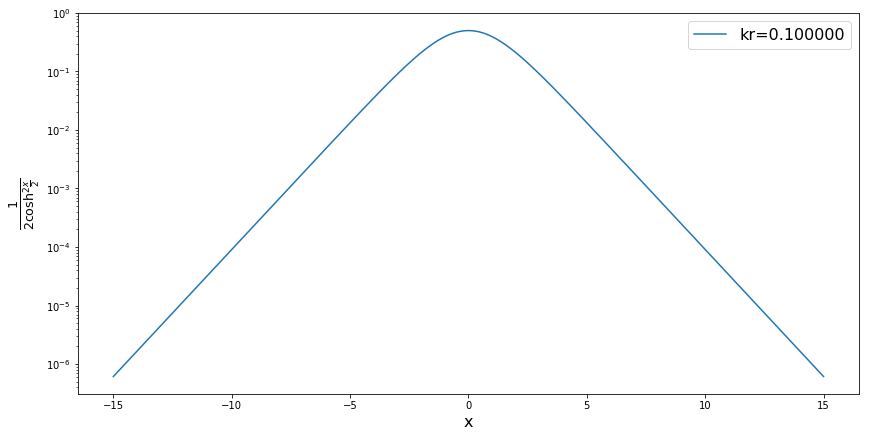

In [103]:
plot1_A2([0.1, 50], 1, xrange=[-15,15], loglog=False)

## Full

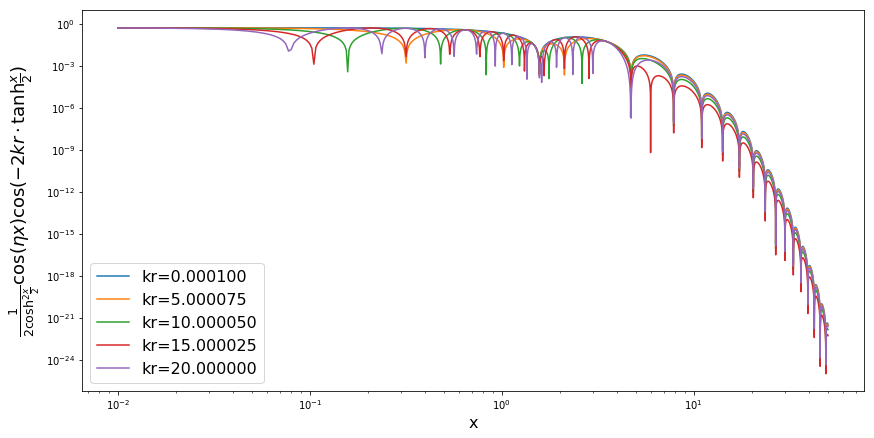

In [25]:
plot2_A2(1, [1e-4, 20], 5, xrange=[1e-2,50])

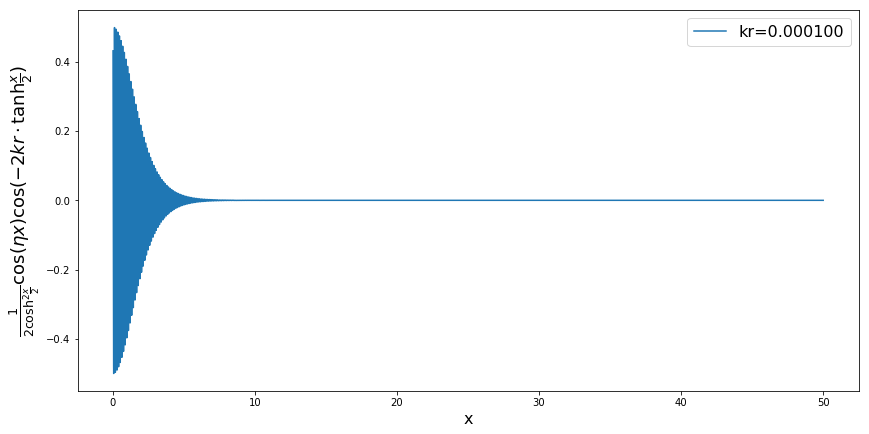

In [37]:
plot2_A2(1e+4, [1e-4, 20], 1, xrange=[1e-2,50])

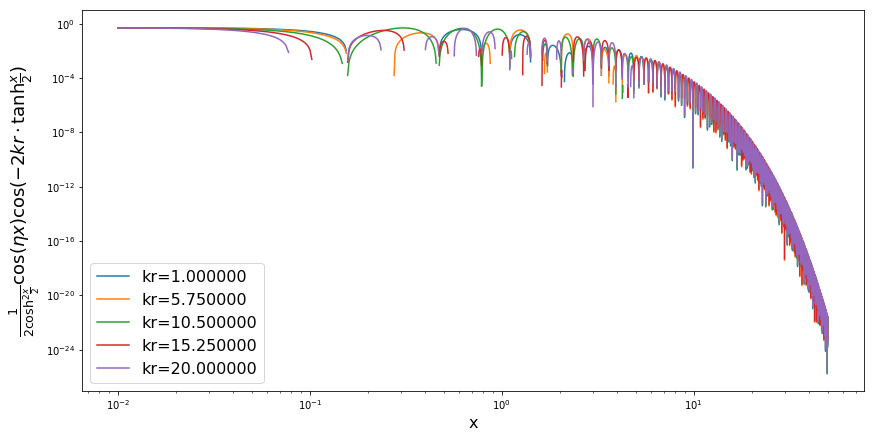

In [106]:
plot2_A2(10, [1, 20], 5, xrange=[1e-2,50])

## Integrate

In [47]:
e = lambda x, kr, eta: np.cos(2*eta*np.arctanh(x))*np.cos(2*x*kr)+np.sin(2*eta*np.arctanh(x))*np.sin(2*x*kr)

In [48]:
func_A2_1 = lambda x, kr, eta: e(x,kr,eta)

In [50]:
func_A1_1 = lambda x, kr, eta: e(x,kr,eta)*sp.special.iv(0,2*kr*np.sqrt(1-x**2))

In [100]:
quad(func_A2_1, -1, 1, args=(300, 1), limit=100)

C:\Users\qati\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


(0.007632067027598825, 0.011102939300115975)

In [ ]:
eta=5

In [106]:
quad(func_A1_1, -1, 1, args=(500, 0.24))

C:\Users\qati\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


(nan, nan)

In [101]:
quad(func_A2_1, -np.inf, np.inf, args=(15, 0.25),  limit=500)

C:\Users\qati\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in arctanh
  if __name__ == '__main__':
C:\Users\qati\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in cos
  if __name__ == '__main__':
C:\Users\qati\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in sin
  if __name__ == '__main__':
C:\Users\qati\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in arctanh
  if __name__ == '__main__':
C:\Users\qati\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


(nan, nan)

In [41]:
exp = lambda x, kr, eta: (np.cos(eta*x)*np.cos(2*kr*np.tanh(x/2.))+np.sin(eta*x)*np.sin(2*kr*np.tanh(x/2.)))
func_A2 = lambda x,kr,eta: exp(x,kr, eta)/2./np.cosh(x/2.)**2

In [83]:
quad(func_A2, -np.inf, np.inf, args=(40, 1), limit=500)

C:\Users\qati\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\qati\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in cosh
  from ipykernel import kernelapp as app


(-0.043886904770011, 1.45607284852921e-08)

In [79]:
quad(func_A2, -np.inf, np.inf, args=(1, 100),  limit=500)

C:\Users\qati\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\qati\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in cosh
  from ipykernel import kernelapp as app


(1.2231662532092892e-10, 1.4852098696481931e-08)

In [ ]:
eta=(mpi/2)*alpha/2/k

In [ ]:
kr